In [ ]:
!nvidia-smi

Sat Sep  4 13:15:05 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Activation,Dropout,Conv2D,MaxPool2D
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from tensorflow.keras.applications.vgg16 import VGG16,preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical
from keras.applications import mobilenet
from sklearn.metrics import confusion_matrix
from tensorflow.math import confusion_matrix
import seaborn as sns
from keras.models import load_model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Unzipping our data

In [ ]:
!unzip '/content/drive/MyDrive/archive (4).zip' -d '/content/drive/MyDrive/eye detection'

Archive:  /content/drive/MyDrive/archive (4).zip
  inflating: /content/drive/MyDrive/eye detection/dataset/test/Closed_Eyes/s0016_00015_1_0_0_0_1_01.png  
  inflating: /content/drive/MyDrive/eye detection/dataset/test/Closed_Eyes/s0016_00016_1_0_0_0_1_01.png  
  inflating: /content/drive/MyDrive/eye detection/dataset/test/Closed_Eyes/s0016_00017_1_0_0_0_1_01.png  
  inflating: /content/drive/MyDrive/eye detection/dataset/test/Closed_Eyes/s0016_00018_1_0_0_0_1_01.png  
  inflating: /content/drive/MyDrive/eye detection/dataset/test/Closed_Eyes/s0016_00019_1_0_0_0_1_01.png  
  inflating: /content/drive/MyDrive/eye detection/dataset/test/Closed_Eyes/s0016_00020_1_0_0_0_1_01.png  
  inflating: /content/drive/MyDrive/eye detection/dataset/test/Closed_Eyes/s0016_00021_1_0_0_0_1_01.png  
  inflating: /content/drive/MyDrive/eye detection/dataset/test/Closed_Eyes/s0016_00022_1_0_0_0_1_01.png  
  inflating: /content/drive/MyDrive/eye detection/dataset/test/Closed_Eyes/s0016_00023_1_0_0_0_1_01.png

In [ ]:
for folder in os.listdir('/content/drive/MyDrive/eye detection/dataset/train'):
  print('folder in training set ',folder)

folder in training set  Closed_Eyes
folder in training set  Open_Eyes


In [ ]:
for folder in os.listdir('/content/drive/MyDrive/eye detection/dataset/test'):
  print('folder in training set ',folder)

folder in training set  Closed_Eyes
folder in training set  Open_Eyes


# Number of our training and test data set

Training set

In [ ]:
test = {}
count = 0
for folder in sorted(os.listdir('/content/drive/MyDrive/eye detection/dataset/train')):
    temp = []
    for files in os.listdir(f'/content/drive/MyDrive/eye detection/dataset/train/{folder}'):
        temp.append(files)
    count += len(temp)
    test[folder] = temp
    print(f"The training {folder} has {len(temp)} images")
print(f"Total images in all folders are {count}")

The training Closed_Eyes has 1760 images
The training Open_Eyes has 1640 images
Total images in all folders are 3400


Test set

In [ ]:
test = {}
count = 0
for folder in sorted(os.listdir('/content/drive/MyDrive/eye detection/dataset/test')):
    temp = []
    for files in os.listdir(f'/content/drive/MyDrive/eye detection/dataset/test/{folder}'):
        temp.append(files)
    count += len(temp)
    test[folder] = temp
    print(f"The training {folder} has {len(temp)} images")
print(f"Total images in all folders are {count}")

The training Closed_Eyes has 240 images
The training Open_Eyes has 360 images
Total images in all folders are 600


# Plot some of our training and test data set

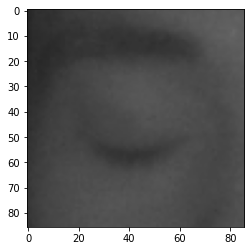

In [ ]:
img_1=cv2.imread('/content/drive/MyDrive/eye detection/dataset/train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png')
plt.imshow(img_1)

shape of the image is:  (83, 83, 3)


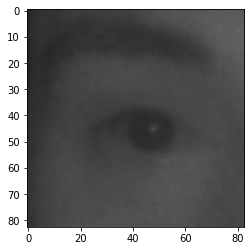

In [ ]:
img_2=cv2.imread('/content/drive/MyDrive/eye detection/dataset/train/Open_Eyes/s0001_02334_0_0_1_0_0_01.png')
plt.imshow(img_2)
print('shape of the image is: ',img_2.shape)

# Augment our photos using imagegenerator

In [ ]:
main_dir='/content/drive/MyDrive/eye detection/dataset'

train_folder=f'{main_dir}/train'
test_folder=f'{main_dir}/test'

In [ ]:
train_generator=ImageDataGenerator(
    rescale=.1/255,
     rotation_range=5,
     width_shift_range=0.2,
     height_shift_range=0.2,
      shear_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest',
    validation_split=0.2)
      

In [ ]:
test_generator=ImageDataGenerator(rescale=.1/255)

# Pass the picture to our image augment generator

In [ ]:
train_imgs=train_generator.flow_from_directory(train_folder,target_size=(83,83),batch_size=64,class_mode='categorical')
test_imgs=train_generator.flow_from_directory(test_folder,target_size=(83,83),batch_size=64,class_mode='categorical')

Found 3400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


# First model

In [ ]:
from keras.layers import Dense,Flatten,Activation,Dropout,Conv2D,MaxPool2D
from keras.models import Sequential
from keras.utils.vis_utils import plot_model

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(83,83,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3)))
model.add(MaxPool2D(2,2))

model.add(Flatten())

model.add(Dense(64,activation='relu',))
model.add(Dropout(0.5))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(2,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 81, 81, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 17, 17, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

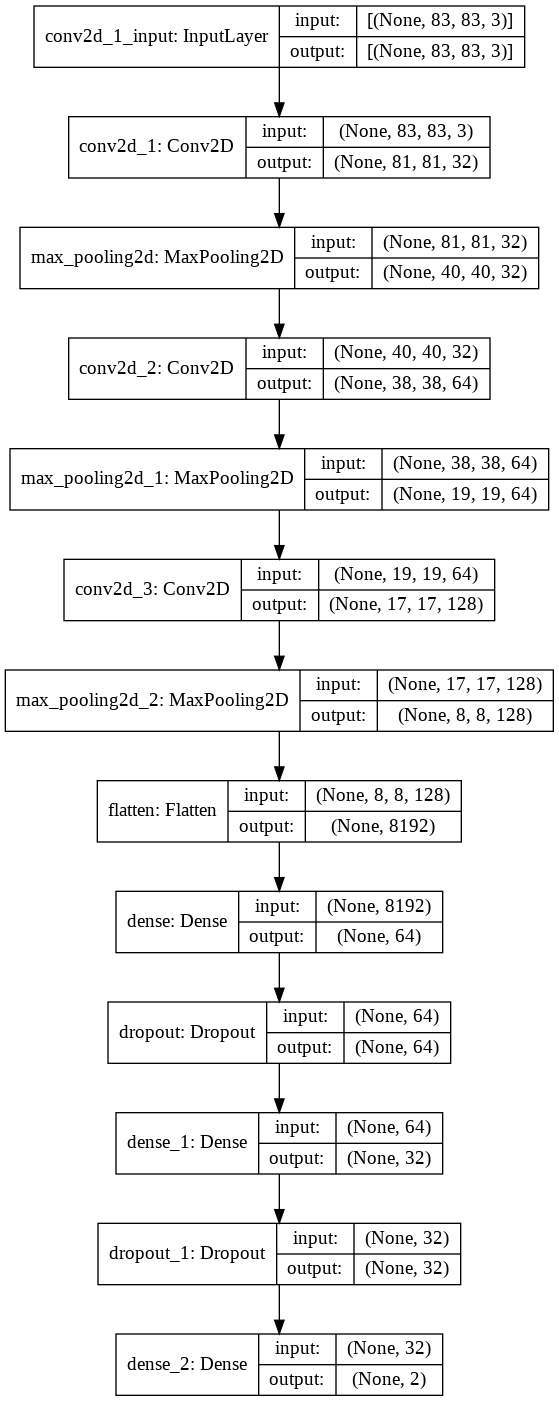

In [ ]:
plot_model(model,show_shapes=True,show_layer_names=True)

In [ ]:
model.fit_generator(train_imgs,steps_per_epoch=5,epochs=10,validation_data=test_imgs)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 [==============================] - 33s 949ms/step - loss: 0.6963 - accuracy: 0.4969 - val_loss: 0.6891 - val_accuracy: 0.4000
Epoch 2/10
5/5 [==============================] - 4s 908ms/step - loss: 0.6931 - accuracy: 0.4469 - val_loss: 0.6964 - val_accuracy: 0.4000
Epoch 3/10
5/5 [==============================] - 4s 881ms/step - loss: 0.6924 - accuracy: 0.5375 - val_loss: 0.6830 - val_accuracy: 0.7967
Epoch 4/10
5/5 [==============================] - 4s 907ms/step - loss: 0.6902 - accuracy: 0.5437 - val_loss: 0.6749 - val_accuracy: 0.5000
Epoch 5/10
5/5 [==============================] - 4s 883ms/step - loss: 0.6855 - accuracy: 0.5031 - val_loss: 0.6409 - val_accuracy: 0.9017
Epoch 6/10
5/5 [==============================] - 4s 886ms/step - loss: 0.6712 - accuracy: 0.5844 - val_loss: 0.5836 - val_accuracy: 0.7783
Epoch 7/10
5/5 [==============================] - 4s 889ms/step - loss: 0.6433 - accuracy: 0.6375 - val_loss: 0.5774 - val_accuracy: 0.5917
Epoch 8/10
5/5 [===

### First model evaluation

Looks like our first model perform rather well. The model is not overfitting.

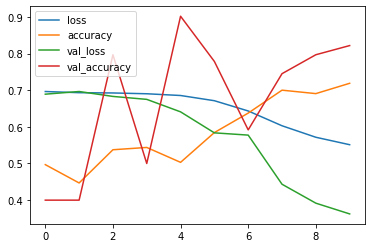

In [ ]:
first_model_history=pd.DataFrame(model.history.history)
first_model_history
first_model_history['loss']

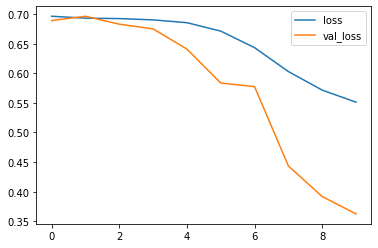

In [ ]:
first_model_history[['loss','val_loss']]
first_model_history[['loss','val_loss']].plot()


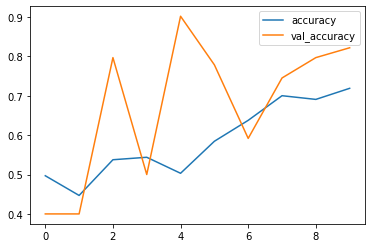

In [ ]:
first_model_history[['loss','val_loss']]
first_model_history[['accuracy','val_accuracy']].plot()

(84, 84, 3)

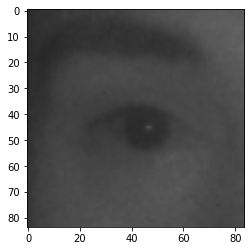

In [ ]:
test_img_1=cv2.imread('/content/drive/MyDrive/eye detection/dataset/train/Open_Eyes/s0001_02360_0_0_1_0_0_01.png')
plt.imshow(test_img_1)
test_img_1.shape

In [ ]:
test_img_1=np.expand_dims(test_img_1,axis=0)
test_img_1.shape

(1, 84, 84, 3)

In [ ]:
np.argmax(model.predict(test_img_1))

0

Here, the model is not predicting the right result

(148, 148, 3)

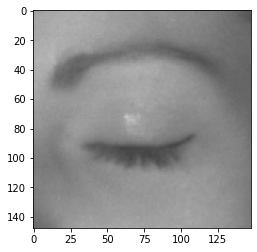

In [ ]:
test_img_2=cv2.imread('/content/drive/MyDrive/eye detection/dataset/test/Closed_Eyes/s0016_00036_1_0_0_0_1_01.png')
plt.imshow(test_img_2)
test_img_2.shape

In [ ]:
test_img_2=np.expand_dims(test_img_2,axis=0)
test_img_2.shape

(1, 148, 148, 3)

In [ ]:
np.argmax(model.predict(test_img_2))

0

Here, the model is predicting the right result

Try making the model predict 10 images from each class of data using for loop

# Second model with more depth

In [ ]:
model2=Sequential()

In [ ]:
model2.add(Conv2D(32,(3,3),activation='relu',input_shape=(83,83,3)))
model2.add(MaxPool2D())

model2.add(Conv2D(64,(3,3),activation='relu'))
model2.add(MaxPool2D())


model2.add(Conv2D(128,(3,3),activation='relu'))
model2.add(MaxPool2D())


model2.add(Flatten())
model2.add(Dense(1024,activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(521,activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(128,activation='relu'))
model2.add(Dropout(0.5))

model2.add(Dense(2,activation='sigmoid'))

In [ ]:
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 81, 81, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 38, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

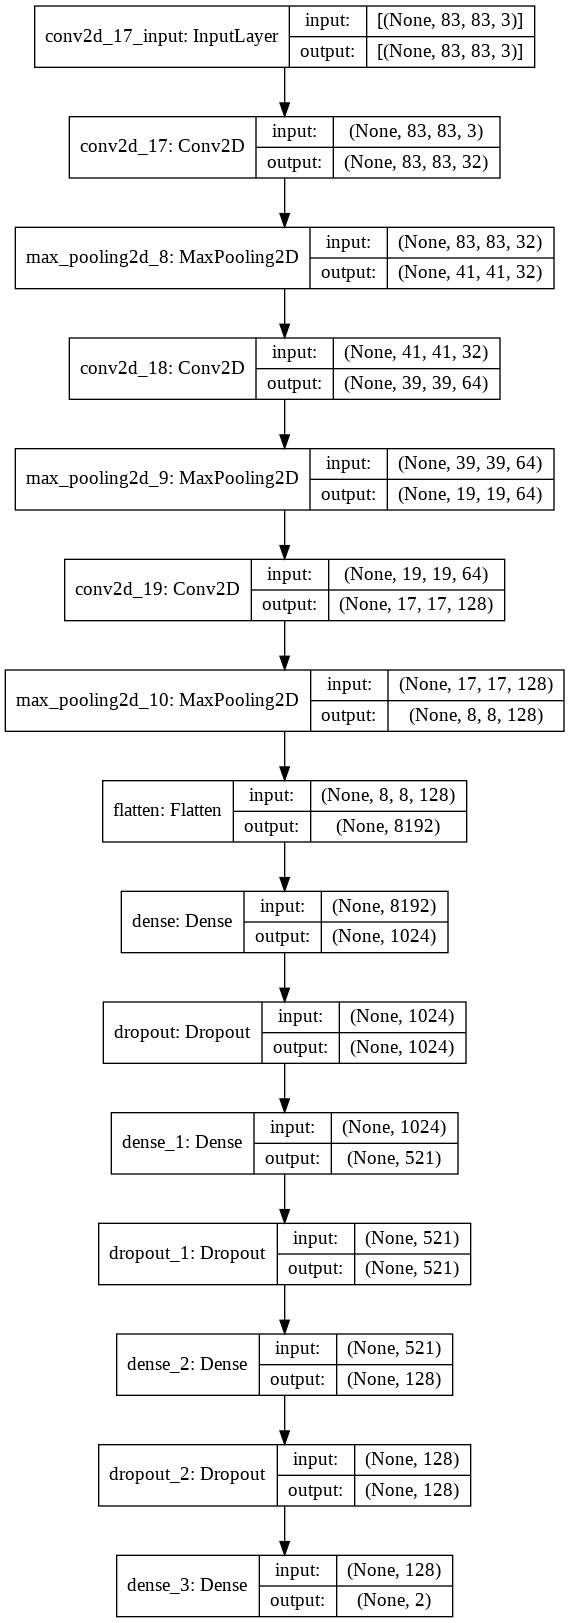

In [ ]:
plot_model(model2,show_shapes=True,show_layer_names=True)

Second model training for a shorter training time

In [ ]:
model2.fit_generator(train_imgs,validation_data=test_imgs,steps_per_epoch=5,epochs=10)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
5/5 [==============================] - 251s 51s/step - loss: 0.6952 - accuracy: 0.4844 - val_loss: 0.6919 - val_accuracy: 0.6000
Epoch 2/10
5/5 [==============================] - 73s 15s/step - loss: 0.6936 - accuracy: 0.4938 - val_loss: 0.6886 - val_accuracy: 0.6000
Epoch 3/10
5/5 [==============================] - 65s 13s/step - loss: 0.6947 - accuracy: 0.4469 - val_loss: 0.6895 - val_accuracy: 0.9517
Epoch 4/10
5/5 [==============================] - 63s 13s/step - loss: 0.6933 - accuracy: 0.5188 - val_loss: 0.6753 - val_accuracy: 0.6000
Epoch 5/10
5/5 [==============================] - 51s 10s/step - loss: 0.6915 - accuracy: 0.5437 - val_loss: 0.6725 - val_accuracy: 0.8817
Epoch 6/10
5/5 [==============================] - 53s 11s/step - loss: 0.6843 - accuracy: 0.6062 - val_loss: 0.5890 - val_accuracy: 0.9400
Epoch 7/10
5/5 [==============================] - 41s 8s/step - loss: 0.6542 - accuracy: 0.6531 - val_loss: 0.3875 - val_accuracy: 0.9017
Epoch 8/10
5/5 [===========

In [ ]:
model2_result=pd.DataFrame(model2.history.history)
model2_result

,loss,accuracy,val_loss,val_accuracy
0,0.695160,0.484375,0.691919,0.600000
1,0.693641,0.493750,0.688573,0.600000
2,0.694717,0.446875,0.689459,0.951667
3,0.693313,0.518750,0.675273,0.600000
4,0.691547,0.543750,0.672483,0.881667
5,0.684281,0.606250,0.588975,0.940000
6,0.654190,0.653125,0.387506,0.901667
7,0.660633,0.615625,0.425798,0.906667
8,0.603683,0.637500,0.504985,0.978333
9,0.587544,0.721875,0.315900,0.965000


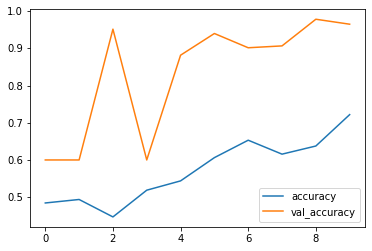

In [ ]:
model2_result[['accuracy','val_accuracy']].plot()

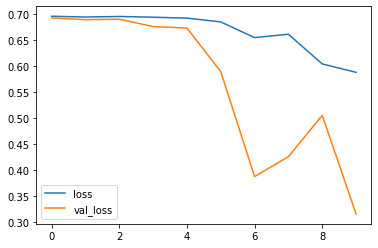

In [ ]:
model2_result[['loss','val_loss']].plot()

Increase the training time

In [ ]:
model2.fit_generator(train_imgs,validation_data=test_imgs,steps_per_epoch=5,epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
5/5 [==============================] - 252s 52s/step - loss: 0.6876 - accuracy: 0.5656 - val_loss: 0.7037 - val_accuracy: 0.4000
Epoch 2/100
5/5 [==============================] - 80s 16s/step - loss: 0.7140 - accuracy: 0.4938 - val_loss: 0.6891 - val_accuracy: 0.7550
Epoch 3/100
5/5 [==============================] - 63s 12s/step - loss: 0.6959 - accuracy: 0.4773 - val_loss: 0.6908 - val_accuracy: 0.6000
Epoch 4/100
5/5 [==============================] - 64s 13s/step - loss: 0.6935 - accuracy: 0.4781 - val_loss: 0.6897 - val_accuracy: 0.6000
Epoch 5/100
5/5 [==============================] - 59s 12s/step - loss: 0.6937 - accuracy: 0.4969 - val_loss: 0.6863 - val_accuracy: 0.6000
Epoch 6/100
5/5 [==============================] - 55s 11s/step - loss: 0.6910 - accuracy: 0.5156 - val_loss: 0.6762 - val_accuracy: 0.6000
Epoch 7/100
5/5 [==============================] - 47s 10s/step - loss: 0.6914 - accuracy: 0.4969 - val_loss: 0.6408 - val_accuracy: 0.6000
Epoch 8/100
5/5 [==

## Second model evaluation

In [ ]:
model2_result_longer_train_time=pd.DataFrame(model2.history.history)
model2_result_longer_train_time

,loss,accuracy,val_loss,val_accuracy
0,0.687575,0.565625,0.703656,0.400000
1,0.714035,0.493750,0.689142,0.755000
2,0.695924,0.477273,0.690753,0.600000
3,0.693535,0.478125,0.689733,0.600000
4,0.693729,0.496875,0.686346,0.600000
...,...,...,...,...
95,0.189808,0.921875,0.018404,0.993333
96,0.161581,0.925000,0.030588,0.988333
97,0.179808,0.925000,0.052466,0.975000
98,0.162054,0.946875,0.022243,0.986667


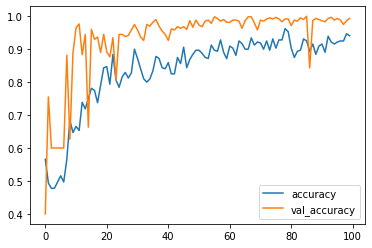

In [ ]:
model2_result_longer_train_time[['accuracy','val_accuracy']].plot()

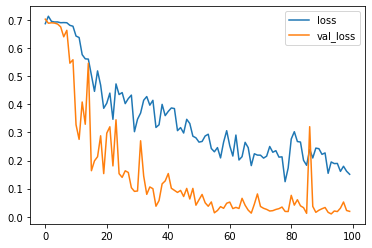

In [ ]:
model2_result_longer_train_time[['loss','val_loss']].plot()

Predicting some of the test images


Making the labels class

In [ ]:
eye_class=['EYES CLOSED','EYES OPENED']

Reading in the image

(84, 84, 3)

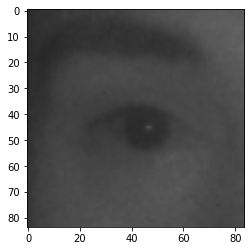

In [ ]:
close_eye_preds=cv2.imread('/content/drive/MyDrive/eye detection/dataset/train/Open_Eyes/s0001_02360_0_0_1_0_0_01.png')
plt.imshow(close_eye_preds)
close_eye_preds.shape

Expanding the image's dimension

In [ ]:
close_eye_preds=np.expand_dims(close_eye_preds,axis=0)
close_eye_preds.shape

(1, 84, 84, 3)

Predict using the model

In [ ]:
eye_class[np.argmax(model2.predict(close_eye_preds))]

'EYES OPENED'

Saving our model



In [ ]:
model2.save('eye_detector_model_2.h5')

## Making the third model

In [ ]:
model3=Sequential()


model3.add(Conv2D(32,(3,3),activation='relu',input_shape=(83,83,3)))
model3.add(MaxPool2D())

model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(MaxPool2D())

model3.add(Flatten())

model3.add(Dense(64,activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(32,activation='relu'))
model3.add(Dropout(0.5))

model3.add(Dense(2,activation='sigmoid'))

In [ ]:
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model3.fit_generator(train_imgs,validation_data=(test_imgs),steps_per_epoch=5,epochs=15)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
5/5 [==============================] - 664s 148s/step - loss: 0.6989 - accuracy: 0.4719 - val_loss: 0.6924 - val_accuracy: 0.4000
Epoch 2/15
5/5 [==============================] - 160s 30s/step - loss: 0.6928 - accuracy: 0.5000 - val_loss: 0.6913 - val_accuracy: 0.7067
Epoch 3/15
5/5 [==============================] - 170s 34s/step - loss: 0.6929 - accuracy: 0.5000 - val_loss: 0.6901 - val_accuracy: 0.8033
Epoch 4/15
5/5 [==============================] - 170s 35s/step - loss: 0.6918 - accuracy: 0.5469 - val_loss: 0.6827 - val_accuracy: 0.9233
Epoch 5/15
5/5 [==============================] - 131s 27s/step - loss: 0.6909 - accuracy: 0.4938 - val_loss: 0.6741 - val_accuracy: 0.9567
Epoch 6/15
5/5 [==============================] - 125s 25s/step - loss: 0.6881 - accuracy: 0.5500 - val_loss: 0.6624 - val_accuracy: 0.9167
Epoch 7/15
5/5 [==============================] - 111s 22s/step - loss: 0.6850 - accuracy: 0.5594 - val_loss: 0.6520 - val_accuracy: 0.9333
Epoch 8/15
5/5 [===

In [ ]:
model3_result_longer_train_time=pd.DataFrame(model3.history.history)
model3_result_longer_train_time

,loss,accuracy,val_loss,val_accuracy
0,0.698894,0.471875,0.692408,0.400000
1,0.692829,0.500000,0.691330,0.706667
2,0.692910,0.500000,0.690096,0.803333
3,0.691806,0.546875,0.682724,0.923333
4,0.690902,0.493750,0.674083,0.956667
5,0.688107,0.550000,0.662371,0.916667
6,0.684969,0.559375,0.651950,0.933333
7,0.676650,0.618750,0.617962,0.955000
8,0.671501,0.584375,0.579582,0.946667
9,0.658141,0.621875,0.539544,0.945000


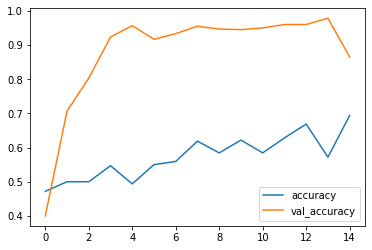

In [ ]:
model3_result_longer_train_time[['accuracy','val_accuracy']].plot()

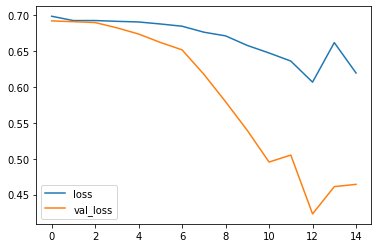

In [ ]:
model3_result_longer_train_time[['loss','val_loss']].plot()

In [ ]:
model3.save('model_3.h5')

## Making the 4th model

4th model with the second model architechure with more training time

In [ ]:
model4=Sequential()

In [ ]:
model4.add(Conv2D(32,(3,3),activation='relu',input_shape=(83,83,3)))
model4.add(MaxPool2D())

model4.add(Conv2D(64,(3,3),activation='relu'))
model4.add(MaxPool2D())


model4.add(Conv2D(128,(3,3),activation='relu'))
model4.add(MaxPool2D())


model4.add(Flatten())
model4.add(Dense(1024,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(521,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(128,activation='relu'))
model4.add(Dropout(0.5))

model4.add(Dense(2,activation='sigmoid'))

In [ ]:
model4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model4.fit_generator(train_imgs,validation_data=(test_imgs),steps_per_epoch=5,epochs=200)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/200
5/5 [==============================] - 351s 74s/step - loss: 0.6939 - accuracy: 0.4625 - val_loss: 0.6935 - val_accuracy: 0.4000
Epoch 2/200
5/5 [==============================] - 115s 23s/step - loss: 0.6927 - accuracy: 0.5125 - val_loss: 0.6941 - val_accuracy: 0.4000
Epoch 3/200
5/5 [==============================] - 104s 21s/step - loss: 0.6934 - accuracy: 0.4719 - val_loss: 0.6890 - val_accuracy: 0.4000
Epoch 4/200
5/5 [==============================] - 89s 18s/step - loss: 0.6880 - accuracy: 0.5594 - val_loss: 0.6739 - val_accuracy: 0.4000
Epoch 5/200
5/5 [==============================] - 80s 16s/step - loss: 0.6914 - accuracy: 0.5094 - val_loss: 0.6718 - val_accuracy: 0.8567
Epoch 6/200
5/5 [==============================] - 72s 15s/step - loss: 0.6852 - accuracy: 0.5688 - val_loss: 0.5838 - val_accuracy: 0.8783
Epoch 7/200
5/5 [==============================] - 62s 12s/step - loss: 0.6599 - accuracy: 0.5750 - val_loss: 0.5552 - val_accuracy: 0.9417
Epoch 8/200
5/5 [

In [ ]:
model4.save('model4.h5')

In [ ]:
model5=Sequential()

In [ ]:
model5.add(Conv2D(32,(3,3),activation='relu',input_shape=(83,83,3)))
model5.add(MaxPool2D())

model5.add(Conv2D(64,(3,3),activation='relu'))
model5.add(MaxPool2D())


model5.add(Conv2D(128,(3,3),activation='relu'))
model5.add(MaxPool2D())


model5.add(Flatten())
model5.add(Dense(1024,activation='relu'))
model5.add(Dropout(0.5))

model5.add(Dense(521,activation='relu'))
model5.add(Dropout(0.5))

model5.add(Dense(128,activation='relu'))
model5.add(Dropout(0.5))

model5.add(Dense(2,activation='sigmoid'))

In [ ]:
model5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model5.fit_generator(train_imgs,validation_data=(test_imgs),steps_per_epoch=5,epochs=70)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/70
5/5 [==============================] - 5s 950ms/step - loss: 0.6924 - accuracy: 0.5281 - val_loss: 0.6939 - val_accuracy: 0.6000
Epoch 2/70
5/5 [==============================] - 3s 796ms/step - loss: 0.6976 - accuracy: 0.4924 - val_loss: 0.6901 - val_accuracy: 0.4000
Epoch 3/70
5/5 [==============================] - 4s 853ms/step - loss: 0.6916 - accuracy: 0.5188 - val_loss: 0.6827 - val_accuracy: 0.4000
Epoch 4/70
5/5 [==============================] - 4s 867ms/step - loss: 0.6868 - accuracy: 0.5406 - val_loss: 0.6475 - val_accuracy: 0.4000
Epoch 5/70
5/5 [==============================] - 4s 872ms/step - loss: 0.6727 - accuracy: 0.5312 - val_loss: 0.5802 - val_accuracy: 0.8417
Epoch 6/70
5/5 [==============================] - 4s 866ms/step - loss: 0.6645 - accuracy: 0.5437 - val_loss: 0.6367 - val_accuracy: 0.6950
Epoch 7/70
5/5 [==============================] - 4s 832ms/step - loss: 0.6977 - accuracy: 0.5094 - val_loss: 0.6214 - val_accuracy: 0.6033
Epoch 8/70
5/5 [====

In [ ]:
model5.save('model5.h5')

# Applying transfer learning

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

In [ ]:
conv_layer1=VGG16(include_top=False,weights='imagenet',input_shape=(83,83,3))

In [ ]:
conv_layer1.trainable=False

In [ ]:
model6=Sequential()


model6.add(conv_layer)


model6.add(Flatten())
model6.add(Dense(1024,activation='relu'))
model6.add(Dropout(0.5))

model6.add(Dense(521,activation='relu'))
model6.add(Dropout(0.5))

model6.add(Dense(128,activation='relu'))
model6.add(Dropout(0.5))

model6.add(Dense(2,activation='sigmoid'))

In [ ]:
model6.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 521)               534025    
_________________________________________________________________
dropout_1 (Dropout)          (None, 521)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               6

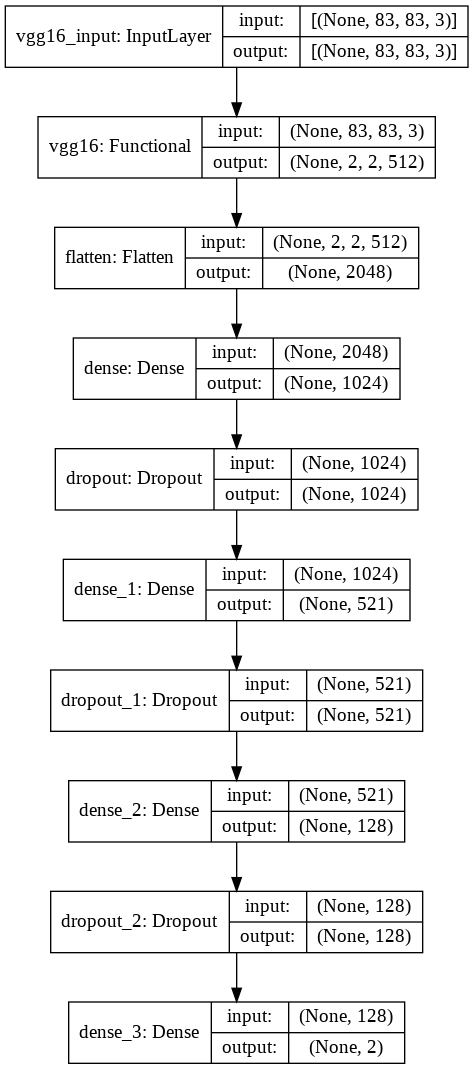

In [ ]:
plot_model(model6,show_layer_names=True,show_shapes=True)

In [ ]:
model6.fit_generator(train_imgs,validation_data=(test_imgs),steps_per_epoch=5,epochs=15)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
5/5 [==============================] - 270s 54s/step - loss: 0.9081 - accuracy: 0.4563 - val_loss: 0.6894 - val_accuracy: 0.6000
Epoch 2/15
5/5 [==============================] - 63s 12s/step - loss: 0.7367 - accuracy: 0.5000 - val_loss: 0.6840 - val_accuracy: 0.6000
Epoch 3/15
5/5 [==============================] - 67s 13s/step - loss: 0.7037 - accuracy: 0.4656 - val_loss: 0.6920 - val_accuracy: 0.6000
Epoch 4/15
5/5 [==============================] - 66s 14s/step - loss: 0.6947 - accuracy: 0.5562 - val_loss: 0.6941 - val_accuracy: 0.4000
Epoch 5/15
5/5 [==============================] - 48s 9s/step - loss: 0.6931 - accuracy: 0.5417 - val_loss: 0.6950 - val_accuracy: 0.4000
Epoch 6/15
5/5 [==============================] - 52s 10s/step - loss: 0.6931 - accuracy: 0.5250 - val_loss: 0.6955 - val_accuracy: 0.4000
Epoch 7/15
5/5 [==============================] - 34s 6s/step - loss: 0.6931 - accuracy: 0.5227 - val_loss: 0.6956 - val_accuracy: 0.4000
Epoch 8/15
5/5 [============

In [ ]:
model6_result=pd.DataFrame(model6.history.history)
model_result

NameError: ignored

## second transfer learning model (mobilenet)

In [ ]:
from keras.applications.mobilenet import MobileNet

In [ ]:
conv_layer=MobileNet(weights='imagenet',input_shape=(83,83,3),include_top=False)

In [ ]:
convo_layer.trainable=False

In [ ]:
model7=Sequential()


model7.add(conv_layer1)


model7.add(Flatten())
model7.add(Dense(1024,activation='relu'))
model7.add(Dropout(0.5))

model7.add(Dense(521,activation='relu'))
model7.add(Dropout(0.5))

model7.add(Dense(128,activation='relu'))
model7.add(Dropout(0.5))

model7.add(Dense(1,activation='tanh'))

In [ ]:
model7.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model7.fit_generator(train_imgs,validation_data=(test_imgs),steps_per_epoch=5,epochs=15)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
5/5 [==============================] - 6s 1s/step - loss: 5.8780 - accuracy: 0.5000 - val_loss: 0.7820 - val_accuracy: 0.5000
Epoch 2/15
5/5 [==============================] - 4s 1s/step - loss: 5.9850 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 3/15
5/5 [==============================] - 4s 955ms/step - loss: 5.3947 - accuracy: 0.5000 - val_loss: 0.7506 - val_accuracy: 0.5000
Epoch 4/15
5/5 [==============================] - 4s 965ms/step - loss: 6.3109 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 5/15
5/5 [==============================] - 4s 969ms/step - loss: 7.5467 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 6/15
5/5 [==============================] - 4s 965ms/step - loss: 7.6543 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 7/15
5/5 [==============================] - 4s 954ms/step - loss: 7.6906 - accuracy: 0.5000 - val_loss: 7.7125 - val_accuracy: 0.5000
Epoch 8/15
5/5 [==========

In [ ]:
model7.save('model7_with_tanh.h5')

# New approach by making labels

Now, instead of passing the labels through image augmentation flow from directory, we will be making our own train/test labels to see if our model performs better.

In [ ]:
categories=['Closed_Eyes','Open_Eyes']



main_dir='/content/drive/MyDrive/eye detection/dataset'

train_folder=f'{main_dir}/train'
test_folder=f'{main_dir}/test'

#empty list
train_data1=[]
train_labels1=[]

#empty list
test_data1=[]
test_labels1=[]


#loop through the categories
for category in categories:
  #from the train folder,get the close/open directory
  path=os.path.join(train_folder,category)
  #loop through the train data set(close,open) folder and get the images
  for img in os.listdir(path):
      #name of the full path
      img_path=os.path.join(path,img)
       #load the images
      image=load_img(img_path,target_size=(83,83))
      #convert the picture to arrays
      image=img_to_array(image)
      #normalize the pictures
      image=image/255


      #append the images to the empty list
      train_data1.append(image)
      #append the labels(from categories list)
      train_labels1.append(category)

In [ ]:
for category in categories:
  #from the train folder,get the close/open directory
  path=os.path.join(test_folder,category)
  for img in os.listdir(path):
      img_path=os.path.join(path,img)
      image=load_img(img_path,target_size=(83,83))
      image=img_to_array(image)
      image=image/255

      test_data1.append(image)
      test_labels1.append(category)

### One hot encoding our labels

In [ ]:
#making label binarizer object
lb=LabelBinarizer()
#converts the labels into 0/1
train_labels=lb.fit_transform(train_labels1)

In [ ]:
#one hot encoding the 1/0 just like pandas get dummies
train_labels=to_categorical(train_labels)


In [ ]:
#one hot encode our test labels
test_labels=lb.fit_transform(test_labels1)
test_labels=to_categorical(test_labels)


## Convert the images to numpy arrays

We need to convert the images to numpy arrays so that our model can understand the format.

In [ ]:
train_data1=np.array(train_data1)
train_labels=np.array(train_labels)


test_data1=np.array(test_data1)
test_labels=np.array(test_labels)

## Plot an instance of an image

the label is : [1. 0.]


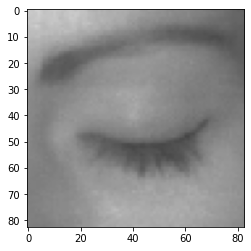

In [ ]:
first_img=train_data1[0]
plt.imshow(first_img)
#the index of 1 shows what the actual labels are
print('the label is :',test_labels[0])

## Building the model

## Augment our pictures.

In [ ]:
generator=ImageDataGenerator(
  rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest"
)

Using VG16 model

In [ ]:
conv_layer=VGG16(weights='imagenet',include_top=False,input_shape=(83,83,3))

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_layer.trainable=False

In [ ]:
Model=Sequential()

Model.add(conv_layer)

Model.add(Flatten())

Model.add(Dense(521,activation='relu'))
Model.add(Dropout(0.5))

Model.add(Dense(128,activation='relu'))
Model.add(Dropout(0.5))

Model.add(Dense(2,activation='sigmoid'))

In [ ]:
Model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
epochs=15
steps_per_epoch=5

This first model can only get to 60% validation accuracy. will try to increase the accuracy

In [ ]:
Model.fit(generator.flow(train_data1,train_labels),validation_data=(test_data1,test_labels),epochs=epochs,steps_per_epoch=steps_per_epoch)

Epoch 1/15
5/5 [==============================] - 3s 434ms/step - loss: 1037665.6250 - accuracy: 0.5688 - val_loss: 1130150.2500 - val_accuracy: 0.4000
Epoch 2/15
5/5 [==============================] - 2s 346ms/step - loss: 1043030.3125 - accuracy: 0.4375 - val_loss: 232421.4688 - val_accuracy: 0.6000
Epoch 3/15
5/5 [==============================] - 2s 347ms/step - loss: 517515.8438 - accuracy: 0.5312 - val_loss: 255400.6875 - val_accuracy: 0.4000
Epoch 4/15
5/5 [==============================] - 2s 347ms/step - loss: 529593.5000 - accuracy: 0.4688 - val_loss: 83882.8906 - val_accuracy: 0.4000
Epoch 5/15
5/5 [==============================] - 2s 349ms/step - loss: 414056.8438 - accuracy: 0.5500 - val_loss: 112888.9219 - val_accuracy: 0.6000
Epoch 6/15
5/5 [==============================] - 2s 346ms/step - loss: 289394.0312 - accuracy: 0.4500 - val_loss: 41712.1719 - val_accuracy: 0.6000
Epoch 7/15
5/5 [==============================] - 2s 348ms/step - loss: 199911.9844 - accuracy: 0.4

In [ ]:
len(train_data1)

3400

An increase in epochs from 15 to 50

the validation accuracy doesnt increase in fact it decreases.

In [ ]:
Model.fit(generator.flow(train_data1,train_labels),validation_data=(test_data1,test_labels),epochs=epochs,steps_per_epoch=steps_per_epoch)

Epoch 1/50
5/5 [==============================] - 2s 369ms/step - loss: 0.6930 - accuracy: 0.5437 - val_loss: 0.9318 - val_accuracy: 0.5900
Epoch 2/50
5/5 [==============================] - 2s 351ms/step - loss: 0.6932 - accuracy: 0.4938 - val_loss: 0.9317 - val_accuracy: 0.5900
Epoch 3/50
5/5 [==============================] - 2s 348ms/step - loss: 0.6932 - accuracy: 0.4875 - val_loss: 0.9316 - val_accuracy: 0.5900
Epoch 4/50
5/5 [==============================] - 2s 350ms/step - loss: 0.6933 - accuracy: 0.4563 - val_loss: 0.9317 - val_accuracy: 0.5900
Epoch 5/50
5/5 [==============================] - 2s 349ms/step - loss: 0.6930 - accuracy: 0.5375 - val_loss: 0.9317 - val_accuracy: 0.5900
Epoch 6/50
5/5 [==============================] - 2s 353ms/step - loss: 0.6930 - accuracy: 0.5375 - val_loss: 0.9316 - val_accuracy: 0.5900
Epoch 7/50
5/5 [==============================] - 2s 349ms/step - loss: 0.6935 - accuracy: 0.4062 - val_loss: 0.9317 - val_accuracy: 0.5900
Epoch 8/50
5/5 [====

Changing the model and using MobileNet model

In [ ]:
conv_layer1=mobilenet.MobileNet(weights='imagenet',include_top=False,input_shape=(83,83,3))

Freezing the layers

In [ ]:
conv_layer1.trainable=False

In [ ]:
Model1=Sequential()

Model1.add(conv_layer1)

Model1.add(Flatten())

Model1.add(Dense(521,activation='relu'))
Model1.add(Dropout(0.5))

Model1.add(Dense(128,activation='relu'))
Model1.add(Dropout(0.5))

Model1.add(Dense(2,activation='sigmoid'))

Model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
Model1.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 2, 2, 1024)        3228864   
_________________________________________________________________
flatten_7 (Flatten)          (None, 4096)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 521)               2134537   
_________________________________________________________________
dropout_8 (Dropout)          (None, 521)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               66816     
_________________________________________________________________
dropout_9 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 2)                

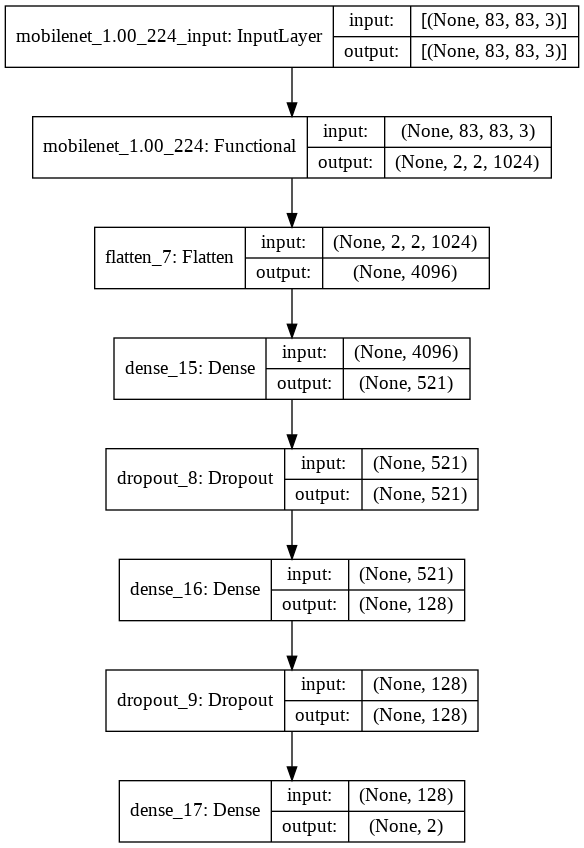

In [ ]:
plot_model(Model1,show_layer_names=True,show_shapes=True)

In [ ]:
Model1.fit(generator.flow(train_data1,train_labels),validation_data=(test_data1,test_labels),epochs=epochs,steps_per_epoch=steps_per_epoch)

Epoch 1/15
5/5 [==============================] - 4s 348ms/step - loss: 0.6752 - accuracy: 0.6938 - val_loss: 0.2191 - val_accuracy: 0.9033
Epoch 2/15
5/5 [==============================] - 1s 150ms/step - loss: 0.2692 - accuracy: 0.9500 - val_loss: 0.0170 - val_accuracy: 1.0000
Epoch 3/15
5/5 [==============================] - 1s 153ms/step - loss: 0.1797 - accuracy: 0.9375 - val_loss: 0.0241 - val_accuracy: 0.9917
Epoch 4/15
5/5 [==============================] - 1s 150ms/step - loss: 0.1697 - accuracy: 0.9375 - val_loss: 0.0650 - val_accuracy: 0.9733
Epoch 5/15
5/5 [==============================] - 1s 149ms/step - loss: 0.0936 - accuracy: 0.9812 - val_loss: 0.0171 - val_accuracy: 0.9917
Epoch 6/15
5/5 [==============================] - 1s 152ms/step - loss: 0.1481 - accuracy: 0.9625 - val_loss: 0.0071 - val_accuracy: 0.9983
Epoch 7/15
5/5 [==============================] - 1s 146ms/step - loss: 0.1300 - accuracy: 0.9500 - val_loss: 4.0337e-04 - val_accuracy: 1.0000
Epoch 8/15
5/5 [

## Final model evaluation


In [ ]:
model_1_result=pd.DataFrame(Model1.history.history)
model_1_result

,loss,accuracy,val_loss,val_accuracy
0,0.675168,0.69375,0.219095,0.903333
1,0.269151,0.95000,0.017042,1.000000
2,0.179674,0.93750,0.024111,0.991667
3,0.169682,0.93750,0.065043,0.973333
4,0.093557,0.98125,0.017124,0.991667
5,0.148070,0.96250,0.007090,0.998333
6,0.129958,0.95000,0.000403,1.000000
7,0.099932,0.96875,0.000238,1.000000
8,0.082848,0.97500,0.003393,1.000000
9,0.091782,0.98750,0.015584,0.993333


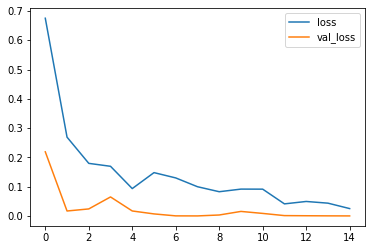

In [ ]:
model_1_result[['loss','val_loss']].plot()

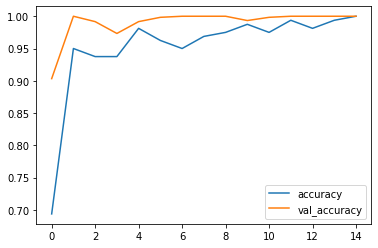

In [ ]:
model_1_result[['accuracy','val_accuracy']].plot()

Making predictions

In [ ]:
predictions=Model1.predict(test_data1)

In [ ]:
#predictions=np.argmax(predictions)
predictions

array([[1.00000000e+00, 1.02230565e-07],
       [1.00000000e+00, 2.36148739e-10],
       [9.99999762e-01, 9.98586415e-07],
       ...,
       [1.20990039e-27, 1.00000000e+00],
       [2.20067035e-28, 1.00000000e+00],
       [3.69087834e-26, 1.00000000e+00]], dtype=float32)

Our predictions are in terms of probability so we use a numpy function to get the index which probability was higher

In [ ]:
predictions=[np.argmax(prediction) for prediction in predictions]

Making a temporary of the actual test labels

In [ ]:
Test_labels=[]

Using the earlier for loop to append the temporary test data labels so that it can be used for confusion matrix

In [ ]:
for category in categories:
  #from the train folder,get the close/open directory
  path=os.path.join(test_folder,category)
  for img in os.listdir(path):
      img_path=os.path.join(path,img)
      #append the actual test labels
      Test_labels.append(category)

In [ ]:
Test_labels=lb.fit_transform(Test_labels)
Test_labels

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

Confusion matrix

Text(87.0, 0.5, 'Predictions')

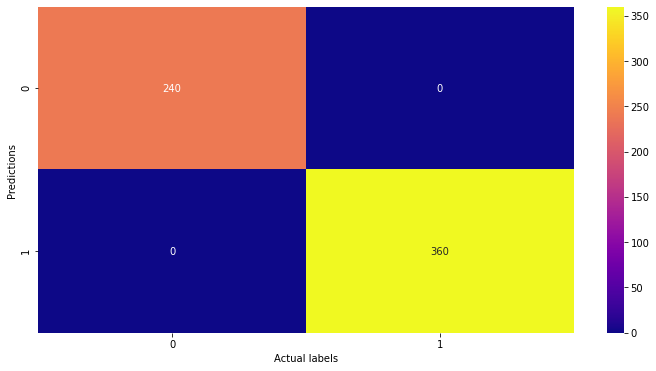

In [ ]:
cm=tf.math.confusion_matrix(labels=Test_labels,predictions=predictions)
cm

plt.figure(figsize=(12,6))
sns.heatmap(cm,annot=True,cmap='plasma',fmt='d')
plt.xlabel('Actual labels')
plt.ylabel('Predictions')

## Saving the final model

In [ ]:
Model1.save('Last model.h5')